## Observing the effect of the learning algorithm
As the final experiment performed for this assignment, the effect of the learning algorithm is observed. Here the two algorithms compared are stochastic gradient descent and batch gradient descent. For each of the two algorithms a seperate hyper-parameter tuning stage has been performed. As a result of this step, good models that perform in a resonably manner for both of the algorithms has been found.
### Necessary Imports
Just like the previous parts of the assignment, the implementations done for this assignment (*ann.py* and *dataset_setup.py*) are used. In addition to these files, two helper libraries are used. These libraries are numpy (for matrix operations) and matplotlib (for plotting purposes).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ann import *
from dataset_setup import *

### Importing the data
To get the datasets, the previously saved data files are used. By using the *Dataset* class implemented, the dataset took the format that is ready to use

In [2]:
file_paths = ['data/train1.txt', 
              'data/test1.txt', 
              'data/train2.txt', 
              'data/test2.txt']
dataset_1 = Dataset(file_paths[0], file_paths[1])
dataset_2 = Dataset(file_paths[2], file_paths[3])

### Helper Functions
In order to demonstrate the results obtained by the experiments, the following helper functions are used. The details of these functions were explained in the previous parts of the assignment.

In [3]:
def draw_uniform_samples(data, no_of_samples):
    max_values = np.max(data, axis=0)
    min_values = np.min(data, axis=0)
    dist = np.random.uniform(min_values[0], max_values[0], no_of_samples)
    return dist

def plot_losses(losses):
    epoch_count = len(losses)
    plt.plot(range(1, epoch_count + 1), losses)
    plt.title("Loss vs Epoch Count", fontsize=14)
    plt.ylabel("Loss", fontsize=10)
    plt.xlabel("Epoch", fontsize=10)
    
def plot_predictions(samples, dist_count, model, title, data_label, loc):
    dist = draw_uniform_samples(samples, dist_count)
    dist = np.reshape(dist, (len(dist), 1))
    y_pred = model.predict(dist)
    sort = list(sorted(zip(dist, y_pred)))
    dist, y_pred = zip(*sort)
    plt.title(title, fontsize=14)
    plt.xlabel("x", fontsize=10)
    plt.ylabel("y", fontsize=10)
    plt.scatter(samples[:, 0], samples[:, 1], label=data_label)
    plt.plot(dist, y_pred, label="Learned model", c="red", lw=2.5)
    plt.legend(loc=loc, borderaxespad=1.0)

def get_loss(data, model):
    labels = data[:, 1]
    samples = data[:, 0]
    samples = np.reshape(samples, (len(samples), 1))
    y_pred = model.predict(samples)
    print("Standard Deviation of loss: {:.4f}".format(np.std(model.loss(labels, y_pred, stage="forward"), axis=0)))
    loss = np.sum(model.loss(labels, y_pred, stage="forward"), axis=0) / len(labels)
    return loss

In [4]:
normalized_train_2, normalized_test_2 = dataset_2.normalize_data()

### ANN Model optimized for Batch Gradient Descent
As the first model, an experiment using batch gradient descent algorithm as its learning method is conducted. As it can be observed from the model parameters, in order to use such a model a small initial weight value and a larger learnşng rate value is selected. The main reason for that is the frequency ofthe updates and the sensitivity to the initial weights that it brings. The threshold for this model is selected as 0.12 considering the model trained for part D. As it an be observed from the loss curve, the learning is smooth and batch learning successfully converges on approximately 6000 epochs. The loss curve and the learned data distribution is given below.

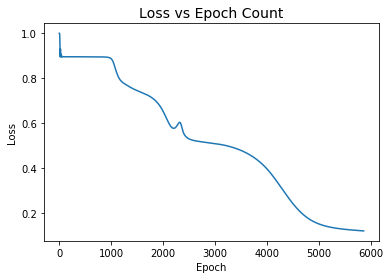

In [34]:
batch_model = ANN(input_dim=1, weight_range=0.0001, loss="mse", hidden_layer_enabled=True, hidden_units=8, activation="tanh")

batch_losses = batch_model.fit(normalized_train_2, 10000, learning_rate=0.1, update="batch", momentum_enabled=True, alpha=0.1, threshold=0.12)

plot_losses(batch_losses)

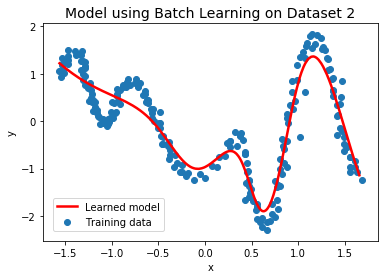

In [35]:
plot_predictions(normalized_train_2, 500, batch_model, "Model using Batch Learning on Dataset 2", "Training data", "lower left")

In [36]:
print("Training Loss: {:.4f}".format(get_loss(normalized_train_2, batch_model)))
print("Threshold: 0.11, Epoch Count: {}".format(len(batch_losses)))

Standard Deviation of loss: 0.1604
Training Loss: 0.1200
Threshold: 0.11, Epoch Count: 5857


### ANN Model optimized for Stochastic Gradient Descent
As the second alternative, SGD algorithm is used for training. Different than the alternative using batch learning, a lower learning rate and a higher stanting weight is selected. The training takes longer amount of epochs but the convergence is stable. The final local minima that the model passes is after a long process which can be observed from the loss curve. The threshold for the loss value is selected as 0.1 for this model. Comparing batch learning and stochastic learning in terms of trainability, they can both learn the provided data distribution by dataset 2 but with different specifications. Depending on the presence of the local minimas batch learning and stochastic learning may e preferred (SGD performs better if there are lots of local minimas - can pass them by taking more stable steps). 

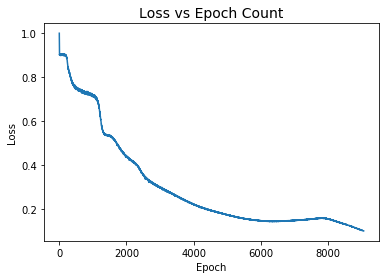

In [7]:
stochastic_model = ANN(input_dim=1, weight_range=0.003, loss="mse", hidden_layer_enabled=True, hidden_units=8, activation="tanh")

stochastic_losses = stochastic_model.fit(normalized_train_2, 10000, learning_rate=0.001, update="sgd", momentum_enabled=True, alpha=0.3, threshold=0.1)

plot_losses(stochastic_losses)

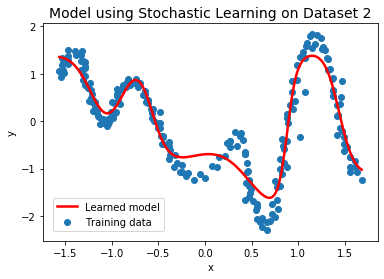

In [8]:
plot_predictions(normalized_train_2, 500, stochastic_model, "Model using Stochastic Learning on Dataset 2", "Training data", "lower left")

In [37]:
print("Training Loss: {:.4f}".format(get_loss(normalized_train_2, stochastic_model)))
print("Threshold: 0.1, Epoch Count: {}".format(len(stochastic_losses)))

Standard Deviation of loss: 0.1997
Training Loss: 0.0991
Threshold: 0.1, Epoch Count: 9064
